In [1]:
import numpy as np
import pandas as pd
import os

# Load each .npy file and convert the list of dictionaries to a DataFrame
dataframes = []
for file in os.listdir('dataset'):
    if file.endswith('.npy'):
        data = np.load('dataset/' + file, allow_pickle=True)
        dataframes.append(pd.DataFrame.from_records(data))

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)
merged_df

,Word,Frame,X00,Y00,Z00,X01,Y01,Z01,X02,Y02,...,Z23,X24,Y24,Z24,X25,Y25,Z25,X26,Y26,Z26
0,Boy,1,-3.320268,12.714561,0.223574,-3.320268,12.714561,0.223574,-3.320268,12.714561,...,1.0,0.0,0.0,0.0,0.530313,0.585678,-0.365724,0.393299,0.607514,0.130718
1,Boy,2,-0.441575,-10.572632,0.370819,-0.500577,-12.161836,0.379360,-0.622653,-11.623393,...,1.0,0.0,0.0,0.0,0.531883,0.588693,-0.381889,0.385701,0.626965,0.241074
2,Boy,3,-0.754394,-7.421648,0.392176,-0.842538,-8.545950,0.401212,-0.967975,-8.040165,...,1.0,0.0,0.0,0.0,0.534591,0.574829,-0.470731,0.376408,0.645435,0.216554
3,Boy,4,-0.678109,-8.186996,0.441856,-0.814776,-9.373079,0.455979,-0.910327,-8.907041,...,1.0,0.0,0.0,0.0,0.484453,0.453059,-0.516997,0.365139,0.629331,0.273374
4,Boy,5,-0.797789,-10.197847,0.429872,-0.955783,-11.699729,0.451075,-1.066465,-11.020497,...,1.0,0.0,0.0,0.0,0.474471,0.342270,-0.453968,0.384628,0.589920,0.266067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112924,You,16,0.587871,9.669083,1.162361,0.726044,11.412089,1.129761,0.655170,10.942098,...,1.0,0.0,0.0,0.0,0.574938,0.538055,0.070751,0.395394,0.452951,-0.300268
112925,You,17,0.337344,21.491173,1.587999,0.362523,25.172693,1.563665,0.306954,24.418745,...,1.0,0.0,0.0,0.0,0.578150,0.539364,0.051295,0.398031,0.515749,-0.181356
112926,You,18,0.215001,30.405003,1.653764,0.260286,35.272096,1.652273,0.141393,34.866246,...,1.0,0.0,0.0,0.0,0.580092,0.541042,0.027703,0.398705,0.534306,-0.237497
112927,You,19,0.182174,30.964133,1.847807,0.224303,36.075314,1.835613,0.095749,35.360101,...,1.0,0.0,0.0,0.0,0.580864,0.542060,0.006164,0.398723,0.538843,-0.243124


In [2]:
max_sequence_length = merged_df['Frame'].max()
max_sequence_length

20

In [3]:
def pad_sequences(group):
    # Calculate the number of padding rows needed
    padding_rows = max_sequence_length - len(group)
    
    # Create a DataFrame with padding rows filled with NaN (or any other padding value)
    padding_df = pd.DataFrame({
        'Word': [group['Word'].iloc[0]] * padding_rows,
        'Frame': np.arange(len(group) + 1, max_sequence_length + 1),
    })
    
    # Concatenate the original group with the padding DataFrame
    return pd.concat([group, padding_df], ignore_index=True)

# Group the DataFrame by 'Word' and apply the padding function
padded_df = merged_df.groupby('Word').apply(pad_sequences).reset_index(drop=True)
padded_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_10832\2834639197.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  padded_df = merged_df.groupby('Word').apply(pad_sequences).reset_index(drop=True)


,Word,Frame,X00,Y00,Z00,X01,Y01,Z01,X02,Y02,...,Z23,X24,Y24,Z24,X25,Y25,Z25,X26,Y26,Z26
0,Boy,1,-3.320268,12.714561,0.223574,-3.320268,12.714561,0.223574,-3.320268,12.714561,...,1.0,0.0,0.0,0.0,0.530313,0.585678,-0.365724,0.393299,0.607514,0.130718
1,Boy,2,-0.441575,-10.572632,0.370819,-0.500577,-12.161836,0.379360,-0.622653,-11.623393,...,1.0,0.0,0.0,0.0,0.531883,0.588693,-0.381889,0.385701,0.626965,0.241074
2,Boy,3,-0.754394,-7.421648,0.392176,-0.842538,-8.545950,0.401212,-0.967975,-8.040165,...,1.0,0.0,0.0,0.0,0.534591,0.574829,-0.470731,0.376408,0.645435,0.216554
3,Boy,4,-0.678109,-8.186996,0.441856,-0.814776,-9.373079,0.455979,-0.910327,-8.907041,...,1.0,0.0,0.0,0.0,0.484453,0.453059,-0.516997,0.365139,0.629331,0.273374
4,Boy,5,-0.797789,-10.197847,0.429872,-0.955783,-11.699729,0.451075,-1.066465,-11.020497,...,1.0,0.0,0.0,0.0,0.474471,0.342270,-0.453968,0.384628,0.589920,0.266067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112924,You,16,0.587871,9.669083,1.162361,0.726044,11.412089,1.129761,0.655170,10.942098,...,1.0,0.0,0.0,0.0,0.574938,0.538055,0.070751,0.395394,0.452951,-0.300268
112925,You,17,0.337344,21.491173,1.587999,0.362523,25.172693,1.563665,0.306954,24.418745,...,1.0,0.0,0.0,0.0,0.578150,0.539364,0.051295,0.398031,0.515749,-0.181356
112926,You,18,0.215001,30.405003,1.653764,0.260286,35.272096,1.652273,0.141393,34.866246,...,1.0,0.0,0.0,0.0,0.580092,0.541042,0.027703,0.398705,0.534306,-0.237497
112927,You,19,0.182174,30.964133,1.847807,0.224303,36.075314,1.835613,0.095749,35.360101,...,1.0,0.0,0.0,0.0,0.580864,0.542060,0.006164,0.398723,0.538843,-0.243124


In [5]:
from sklearn.preprocessing import MinMaxScaler

data = padded_df.drop('Word', axis=1)
target = padded_df['Word']

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))

features_scaled = scaler.fit_transform(data)

# import pickle
# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

###Random Forest

In [ ]:
# # Define the interval
# interval = 20

# # Initialize lists to hold the training and testing sets
# X_train_list = []
# y_train_list = []
# X_test_list = []
# y_test_list = []

# # Iterate over features_scaled with a step of 20
# for i in range(0, len(padded_df) - interval, 3*interval):
#     # Slice the dataset for the current interval
#     X_train = pd.DataFrame(features_scaled[i:i+2*interval])
#     y_train = pd.DataFrame(target[i:i+2*interval])

#     X_test = pd.DataFrame(features_scaled[i+2*interval:i+3*interval])
#     y_test = pd.DataFrame(target[i+2*interval:i+3*interval])

#     # Append the sliced DataFrames to the lists
#     X_train_list.append(X_train)
#     y_train_list.append(y_train)
#     X_test_list.append(X_test)
#     y_test_list.append(y_test)

# # Convert the lists to DataFrames
# X_train_df = pd.concat(X_train_list)
# y_train_df = pd.concat(y_train_list)
# X_test_df = pd.concat(X_test_list)
# y_test_df = pd.concat(y_test_list)

# X_train_df

In [45]:
# from sklearn.ensemble import RandomForestClassifier

# # Initialize the model
# clf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model
# clf.fit(X_train, y_train)

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [ ]:
# from sklearn.metrics import classification_report

# # Make predictions on the test set
# y_pred = clf.predict(X_test_df)

# # Evaluate the model
# print(classification_report(y_test_df, y_pred))

In [ ]:
# import pickle

# with open('rfmodel.pkl', 'wb') as file:
#     pickle.dump(clf, file)


LSTM

In [6]:
# Define the number of time steps
time_steps = 20

# Prepare the data
X = []
y = []

for i in range(0, len(features_scaled) - time_steps, time_steps):
    X.append(features_scaled[i:i + time_steps])
    y.append(target[i])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Reshape X to fit the LSTM input shape: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
len(X)

5646

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' is your target variable with categorical values
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
num_classes = len(encoder.classes_)
print(X_train.shape[1], X_train.shape[2])


20 82


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(num_classes, activation='softmax')) # num_classes is the number of unique words you're predicting) # num_classes is the number of unique words you're predicting

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train_encoded, epochs=33, batch_size=32, validation_split=0.2)

Epoch 1/33
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8407 - loss: 0.4660 - val_accuracy: 0.7124 - val_loss: 0.9510
Epoch 2/33
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8488 - loss: 0.4496 - val_accuracy: 0.7157 - val_loss: 0.9562
Epoch 3/33
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8699 - loss: 0.4094 - val_accuracy: 0.6825 - val_loss: 1.0614
Epoch 4/33
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8620 - loss: 0.4257 - val_accuracy: 0.7035 - val_loss: 0.9994
Epoch 5/33
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8470 - loss: 0.4330 - val_accuracy: 0.7002 - val_loss: 0.9562
Epoch 6/33
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8293 - loss: 0.4993 - val_accuracy: 0.7190 - val_loss: 0.9325
Epoch 7/33
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8786 - loss: 0.3739 - val_accuracy: 0.6980 - val_loss: 0.9738
Epoch 8/33
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8415 - loss: 0.4534 - val_accu

In [36]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7168 - loss: 1.0735
Test Loss: 1.0156817436218262, Test Accuracy: 0.7176991105079651


In [38]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test) # Replace `model` with your trained LSTM model and `X_test` with your test dataset
y_pred_labels = np.argmax(y_pred, axis=1)
# Print the classification report
print(classification_report(y_test_encoded, y_pred_labels))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       104
           1       0.82      0.86      0.84        95
           2       0.61      0.58      0.60        91
           3       0.65      0.70      0.68        74
           4       0.62      0.73      0.67        77
           5       0.89      0.96      0.92        91
           6       0.55      0.82      0.66        33
           7       0.63      0.54      0.58        78
           8       0.64      0.60      0.62        78
           9       0.92      0.85      0.88        27
          10       0.42      0.48      0.44        42
          11       0.93      0.76      0.84        17
          12       0.87      0.80      0.83        25
          13       0.58      0.78      0.67         9
          14       0.66      0.70      0.68        91
          15       0.84      0.70      0.76        89
          16       0.74      0.64      0.6

In [50]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='softmax')) # num_classes is the number of unique words you're predicting) # num_classes is the number of unique words you're predicting

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.0746 - loss: 2.7674 - val_accuracy: 0.0874 - val_loss: 2.7068
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0780 - loss: 2.7206 - val_accuracy: 0.0796 - val_loss: 2.7124
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0766 - loss: 2.7258 - val_accuracy: 0.1095 - val_loss: 2.7180
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0831 - loss: 2.7288 - val_accuracy: 0.0962 - val_loss: 2.7074
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0919 - loss: 2.7110 - val_accuracy: 0.1162 - val_loss: 2.6383
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1170 - loss: 2.6468 - val_accuracy: 0.1538 - val_loss: 2.5534
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1395 - loss: 2.5264 - val_accuracy: 0.1958 - val_loss: 2.3855
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1814 - loss: 2.4168 - 

In [53]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7401 - loss: 0.9165
Test Loss: 0.8954323530197144, Test Accuracy: 0.7398229837417603


In [54]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test) # Replace `model` with your trained LSTM model and `X_test` with your test dataset
y_pred_labels = np.argmax(y_pred, axis=1)
# Print the classification report
print(classification_report(y_test_encoded, y_pred_labels))

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.85      0.87      0.86        95
           2       0.59      0.64      0.61        91
           3       0.73      0.70      0.72        74
           4       0.68      0.73      0.70        77
           5       0.87      0.98      0.92        91
           6       0.54      0.79      0.64        33
           7       0.69      0.56      0.62        78
           8       0.66      0.65      0.66        78
           9       0.91      0.74      0.82        27
          10       0.40      0.50      0.45        42
          11       0.62      0.88      0.73        17
          12       0.83      0.76      0.79        25
          13       0.80      0.44      0.57         9
          14       0.81      0.60      0.69        91
          15       0.87      0.74      0.80        89
          16       0.77      0.78      0.

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=20,            # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best weights at the end
)


In [95]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
# model.add(LSTM(16))
model.add(Dense(num_classes, activation='softmax')) # num_classes is the number of unique words you're predicting) # num_classes is the number of unique words you're predicting

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
history = model.fit(
    X_train, y_train_encoded,
    epochs=120,                 
    batch_size=32,              
    validation_split=0.15,       
    callbacks=[early_stopping]  
)

Epoch 1/120
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0756 - loss: 2.7640 - val_accuracy: 0.1018 - val_loss: 2.7149
Epoch 2/120
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0876 - loss: 2.7303 - val_accuracy: 0.1018 - val_loss: 2.7038
Epoch 3/120
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0795 - loss: 2.7293 - val_accuracy: 0.0560 - val_loss: 2.7161
Epoch 4/120
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0764 - loss: 2.7284 - val_accuracy: 0.0870 - val_loss: 2.7027
Epoch 5/120
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0815 - loss: 2.7244 - val_accuracy: 0.0708 - val_loss: 2.7017
Epoch 6/120
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0838 - loss: 2.7061 - val_accuracy: 0.1224 - val_loss: 2.7057
Epoch 7/120
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1247 - loss: 2.6283 - val_accuracy: 0.0959 - val_loss: 2.5440
Epoch 8/120
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1671 - loss: 2.4514 - 

In [88]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7611 - loss: 0.7995
Test Loss: 0.8094561696052551, Test Accuracy: 0.7504425048828125


In [89]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test) # Replace `model` with your trained LSTM model and `X_test` with your test dataset
y_pred_labels = np.argmax(y_pred, axis=1)
# Print the classification report
print(classification_report(y_test_encoded, y_pred_labels))


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       104
           1       0.88      0.85      0.87        95
           2       0.65      0.57      0.61        91
           3       0.71      0.77      0.74        74
           4       0.74      0.65      0.69        77
           5       0.96      0.96      0.96        91
           6       0.64      0.70      0.67        33
           7       0.62      0.60      0.61        78
           8       0.66      0.73      0.69        78
           9       0.85      0.85      0.85        27
          10       0.51      0.55      0.53        42
          11       0.76      0.94      0.84        17
          12       0.77      0.92      0.84        25
          13       0.70      0.78      0.74         9
          14       0.71      0.70      0.71        91
          15       0.75      0.85      0.80        89
          16       0.79      0.68      0.

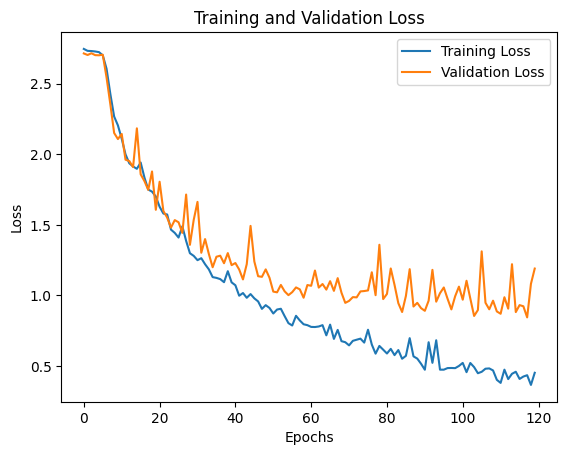

In [90]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [98]:
history = model.fit(
    X_train, y_train_encoded,
    epochs=150,                 
    batch_size=32,              
    validation_split=0.15,       
    # callbacks=[early_stopping]  
)

Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0850 - loss: 2.7263 - val_accuracy: 0.1018 - val_loss: 2.7034
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0837 - loss: 2.7320 - val_accuracy: 0.1018 - val_loss: 2.7067
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0796 - loss: 2.7366 - val_accuracy: 0.1018 - val_loss: 2.6956
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0789 - loss: 2.7209 - val_accuracy: 0.1165 - val_loss: 2.6919
Epoch 5/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0757 - loss: 2.7116 - val_accuracy: 0.0664 - val_loss: 2.6457
Epoch 6/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0776 - loss: 2.6889 - val_accuracy: 0.0634 - val_loss: 2.7560
Epoch 7/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0840 - loss: 2.7232 - val_accuracy: 0.1195 - val_loss: 2.6415
Epoch 8/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0966 - loss: 2.6422 - 

In [99]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7560 - loss: 0.8684
Test Loss: 0.8895268440246582, Test Accuracy: 0.7486725449562073


In [100]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test) # Replace `model` with your trained LSTM model and `X_test` with your test dataset
y_pred_labels = np.argmax(y_pred, axis=1)
# Print the classification report
print(classification_report(y_test_encoded, y_pred_labels))


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       104
           1       0.90      0.84      0.87        95
           2       0.69      0.67      0.68        91
           3       0.65      0.88      0.75        74
           4       0.71      0.70      0.71        77
           5       0.94      0.93      0.94        91
           6       0.58      0.55      0.56        33
           7       0.59      0.55      0.57        78
           8       0.67      0.74      0.71        78
           9       0.92      0.85      0.88        27
          10       0.49      0.50      0.49        42
          11       0.74      0.82      0.78        17
          12       0.85      0.88      0.86        25
          13       0.62      0.56      0.59         9
          14       0.70      0.76      0.73        91
          15       0.78      0.82      0.80        89
          16       0.82      0.64      0.

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [39]:
import tensorflow as tf
# with open('lstmmodel.pkl', 'wb') as file:
#     pickle.dump(model, file)
model.save('lstmmodel.h5')
tf.saved_model.save(model, 'saved_model')
# pip install openvino-dev[tensorflow]

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [40]:
import pickle
with open('lstmmodel.pkl', 'rb') as f:
    model = pickle.load(f)
    
if isinstance(model, tf.keras.Model):
    model.save('lstmmodel.h5')
    
    tf.saved_model.save(model, 'saved_model')
    # model.save('path_to_your_model/model.h5')

FileNotFoundError: [Errno 2] No such file or directory: 'lstmmodel.pkl'

In [41]:
import tensorflow as tf
from openvino.runtime import Core, serialize

# Convert to IR (example with quantization)
mo_cmd = f"mo --saved_model_dir saved_model --input_shape '[1, 20, 199]' --output_dir ir --data_type FP16"
import subprocess
subprocess.call(mo_cmd, shell=True)

# convert a saved model to IR format using the Model Optimizer in python through core
core = Core()
model = core.read_model("saved_model")
compiled_model = core.compile_model(model, "CPU")
serialize(model, xml_path="ir/intel_model.xml")

In [42]:

model_xml = "ir/intel_model.xml"
model = core.read_model(model=model_xml)
print(model.inputs)
print(model.outputs)

[<Output: names[inputs] shape[?,20,82] type: f32>]
[<Output: names[output_0] shape[?,17] type: f32>]


In [43]:
# Load IR model and compile for target device
core = Core()
model_ = core.read_model("ir/intel_model.xml")
compiled_model = core.compile_model(model, "CPU")
input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

In [ ]:
# for single input models only
result = compiled_model(input_data)[output_layer]

# for multiple inputs in a list
result = compiled_model([input_data])[output_layer]

# or using a dictionary, where the key is input tensor name or index
result = compiled_model({input_layer.any_name: input_data})[output_layer]